###### Data Source: 
https://www.kaggle.com/hb20007/gender-classification

###### Why: 
I thought it might be interesting to determine peoples gender based on their choices

###### Possible Challenges: 
Questions asked are too generic in my opinion hence might be a bit harder to do

###### Initial Mistakes: 
Tried Schuffling the data but realized it might skew the results cos I'll have all male or all female hence I 
split the data into test and train since I later realized the data had equal amount of males and females

###### Characteristics of Data: 
Luckily for me all the attributes are categorical hence I can scale it easily 

###### Trial
Attempt 1 --- Found Mode of Each attribute pertaining to gender and tried using that for prodiction, had bad results (2 out of 12)

Attempt 2 --- Computed support per attribute and used attributes beyond 0.2 threshhold. Had better results (8 out of 12)

###### Thoughts
After the seond attempt it's realised the approach can be improved for mutiple attributes and genralized to solve more classification problems 

In [1]:
# importing needed libraries
import pandas as pd
import pandas_profiling

In [2]:
# reading csv file
df = pd.read_csv('data.csv')

In [3]:
# profiling dataset for better insights into the data 
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="profile.html")

In [4]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [5]:
# grouping data by gender and splitting data into male and female, 
# schuffling data to ensure randomization on multiple runs
gb = df.groupby('Gender')  
df_male = gb.get_group('M').sample(frac=1, random_state=1)
df_female = gb.get_group('F').sample(frac=1, random_state=1)

In [6]:
# creating test data
df_test = pd.concat([df_male[-6:], df_female[-6:]])

In [7]:
# removing test data fron training data
df_male = df_male[:-6]

In [8]:
# removing test data fron training data
df_female = df_female[:-6]

In [9]:
# exploring categorical data
colors = df.Favorite_Color.unique()
music_genres = df.Favorite_Music_Genre.unique()
beverages = df.Favorite_Beverage.unique()
soft_drinks = df.Favorite_Soft_Drink.unique()

The following cells explore the various categorical data

In [10]:
df_male['Favorite_Color'].value_counts()

Cool       14
Warm        8
Neutral     3
Name: Favorite_Color, dtype: int64

In [11]:
df_female['Favorite_Color'].value_counts()

Cool       15
Warm        9
Neutral     1
Name: Favorite_Color, dtype: int64

In [12]:
df_male['Favorite_Music_Genre'].value_counts()

Rock                7
Electronic          6
Hip hop             5
R&B and soul        3
Pop                 2
Jazz/Blues          1
Folk/Traditional    1
Name: Favorite_Music_Genre, dtype: int64

In [13]:
df_female['Favorite_Music_Genre'].value_counts()

Pop                 10
Rock                 6
Jazz/Blues           2
Electronic           2
Folk/Traditional     2
R&B and soul         2
Hip hop              1
Name: Favorite_Music_Genre, dtype: int64

In [14]:
df_male['Favorite_Beverage'].value_counts()

Doesn't drink    7
Other            4
Beer             4
Vodka            4
Wine             3
Whiskey          3
Name: Favorite_Beverage, dtype: int64

In [15]:
df_female['Favorite_Beverage'].value_counts()

Whiskey          5
Beer             5
Other            4
Doesn't drink    4
Wine             4
Vodka            3
Name: Favorite_Beverage, dtype: int64

In [16]:
df_female['Favorite_Soft_Drink'].value_counts()

Coca Cola/Pepsi    13
7UP/Sprite          5
Fanta               5
Other               2
Name: Favorite_Soft_Drink, dtype: int64

In [17]:
df_male['Favorite_Soft_Drink'].value_counts()

Coca Cola/Pepsi    10
Fanta               7
Other               4
7UP/Sprite          4
Name: Favorite_Soft_Drink, dtype: int64

Exploring mode as a means of possible classification. 
Just by inspection, the mode will produce too many errors 

In [18]:
df_male.mode()

,Favorite_Color,Favorite_Music_Genre,Favorite_Beverage,Favorite_Soft_Drink,Gender
0,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,M


In [19]:
df_female.mode()

,Favorite_Color,Favorite_Music_Genre,Favorite_Beverage,Favorite_Soft_Drink,Gender
0,Cool,Pop,Beer,Coca Cola/Pepsi,F
1,NaN,NaN,Whiskey,NaN,NaN


In [20]:
# importing seaborn for visual inspection of data
import seaborn as sns

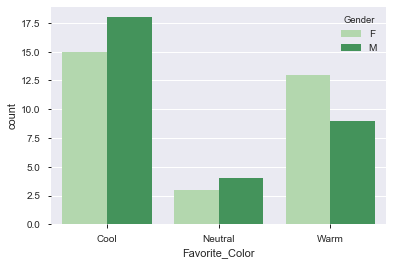

In [21]:
sns.countplot('Favorite_Color', hue='Gender', data=df, palette='Greens')

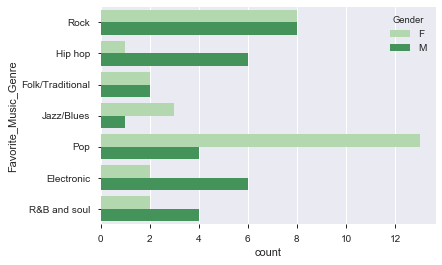

In [22]:
sns.countplot(y='Favorite_Music_Genre', hue='Gender', data=df, palette='Greens')

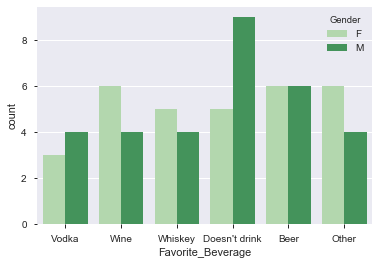

In [23]:
sns.countplot('Favorite_Beverage', hue='Gender', data=df, palette='Greens')

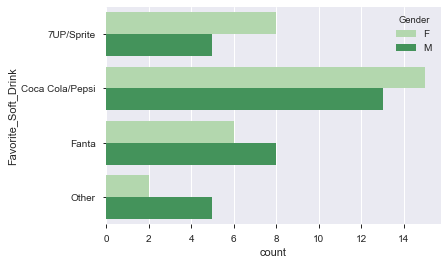

In [24]:
sns.countplot(y='Favorite_Soft_Drink', hue='Gender', data=df, palette='Greens');

The following lines implements the core algorithm and tests it

In [25]:
def compute_support_per_category(column_name, data_frame):
    values = data_frame[column_name].value_counts(normalize=True).keys().tolist()
    counts = data_frame[column_name].value_counts(normalize=True).tolist()  
    results = dict(zip(values, counts))
    return results

columns = ['Favorite_Color', 'Favorite_Music_Genre', 'Favorite_Beverage', 'Favorite_Soft_Drink']

In [26]:
def generate_support(data_frame):
    response_dict = {}
    for col in columns:
        response_dict[col] = compute_support_per_category(col, data_frame)
    return response_dict

In [27]:
male = generate_support(df_male)
female = generate_support(df_female)

In [28]:
male

{'Favorite_Color': {'Cool': 0.56, 'Warm': 0.32, 'Neutral': 0.12},
 'Favorite_Music_Genre': {'Rock': 0.28,
  'Electronic': 0.24,
  'Hip hop': 0.2,
  'R&B and soul': 0.12,
  'Pop': 0.08,
  'Jazz/Blues': 0.04,
  'Folk/Traditional': 0.04},
 'Favorite_Beverage': {"Doesn't drink": 0.28,
  'Other': 0.16,
  'Beer': 0.16,
  'Vodka': 0.16,
  'Wine': 0.12,
  'Whiskey': 0.12},
 'Favorite_Soft_Drink': {'Coca Cola/Pepsi': 0.4,
  'Fanta': 0.28,
  'Other': 0.16,
  '7UP/Sprite': 0.16}}

In [29]:
female

{'Favorite_Color': {'Cool': 0.6, 'Warm': 0.36, 'Neutral': 0.04},
 'Favorite_Music_Genre': {'Pop': 0.4,
  'Rock': 0.24,
  'Jazz/Blues': 0.08,
  'Electronic': 0.08,
  'Folk/Traditional': 0.08,
  'R&B and soul': 0.08,
  'Hip hop': 0.04},
 'Favorite_Beverage': {'Whiskey': 0.2,
  'Beer': 0.2,
  'Other': 0.16,
  "Doesn't drink": 0.16,
  'Wine': 0.16,
  'Vodka': 0.12},
 'Favorite_Soft_Drink': {'Coca Cola/Pepsi': 0.52,
  '7UP/Sprite': 0.2,
  'Fanta': 0.2,
  'Other': 0.08}}

In [30]:
from collections import OrderedDict
#women
woman = OrderedDict()

for col in columns:
    res = {key: abs(female[col][key] - male[col].get(key, 0)) 
                       for key in male[col].keys()} 
    woman.update({col: res})

In [31]:
#Actual Algorithm
for key in columns:
    for k in list(woman[key]): 
        if woman[key][k]<= 0.2:
            del woman[key][k]
woman

OrderedDict([('Favorite_Color', {}),
             ('Favorite_Music_Genre', {'Pop': 0.32}),
             ('Favorite_Beverage', {}),
             ('Favorite_Soft_Drink', {})])

In [32]:
df_train = pd.concat([df_male, df_female])

In [33]:
df_train['Favorite_Beverage'].value_counts()

Doesn't drink    11
Beer              9
Other             8
Whiskey           8
Wine              7
Vodka             7
Name: Favorite_Beverage, dtype: int64

In [34]:
df_male['Favorite_Beverage'].value_counts()

Doesn't drink    7
Other            4
Beer             4
Vodka            4
Wine             3
Whiskey          3
Name: Favorite_Beverage, dtype: int64

In [35]:
df_female['Favorite_Beverage'].value_counts()

Whiskey          5
Beer             5
Other            4
Doesn't drink    4
Wine             4
Vodka            3
Name: Favorite_Beverage, dtype: int64

In [36]:
result = 'M'
vote_male = 0
vote_female = 0

for index, row in df_test.iterrows():
    if row['Favorite_Color'] in woman['Favorite_Color']:
        result = 'F'
    if row['Favorite_Music_Genre'] in woman['Favorite_Music_Genre']:
        result = 'F'
    if row['Favorite_Beverage'] in woman['Favorite_Beverage']:
        result = 'F'
    if row['Favorite_Soft_Drink'] in woman['Favorite_Soft_Drink']:
        result = 'F'
    
    print('actual ---', row['Gender'])
    print('predicted ---', result)
    print('--------------')   

actual --- M
predicted --- M
--------------
actual --- M
predicted --- M
--------------
actual --- M
predicted --- F
--------------
actual --- M
predicted --- F
--------------
actual --- M
predicted --- F
--------------
actual --- M
predicted --- F
--------------
actual --- F
predicted --- F
--------------
actual --- F
predicted --- F
--------------
actual --- F
predicted --- F
--------------
actual --- F
predicted --- F
--------------
actual --- F
predicted --- F
--------------
actual --- F
predicted --- F
--------------
